In [31]:
import random
import json
import math
import datetime

# Read data from JSON files
with open('user_data.json', 'r') as file:
    user_data = json.load(file)

with open('private_parking.json', 'r') as file:
    private_parking_freiburg = json.load(file)

with open('public_parking.json', 'r') as file:
    public_parking = json.load(file)

# def calculate_hours_spent(opening_time, closing_time, booking_time):
#     fmt = "%H:%M"
    
#     # Convert times to datetime objects
#     open_time = datetime.datetime.strptime(opening_time, fmt)
#     close_time = datetime.datetime.strptime(closing_time, fmt)
#     booking_time = datetime.datetime.strptime(booking_time, "%Y-%m-%dT%H:%M:%S")  # ISO format
    
#     # Calculate max possible hours
#     max_possible_hours = (close_time - booking_time).seconds / 3600
#     total_available_hours = (close_time - open_time).seconds / 3600
    
#     # Ensure a valid range (minimum 1 hour, whole number)
#     hours_spent = min(math.floor(max_possible_hours), math.floor(total_available_hours))
#     return max(1, hours_spent)  # Ensure at least 1 hour


def generate_user_id():
    return random.choice(user_data)['user_id']


def generate_parking_info():
    # 70% chance for public parking, 30% for private parking
    if random.random() < 0.7:
        parking_info = random.choice(public_parking)
    else:
        parking_info = random.choice(private_parking_freiburg)
    
    return (
        parking_info.get('public_id', parking_info.get('private_id')),
        parking_info['longitude'],
        parking_info['latitude'],
        parking_info['opening_time'],
        parking_info['closing_time'],
        parking_info['open_days'],
        parking_info.get('price_per_hour', float('nan'))
    )


def generate_random_review():
    reviews = [
        ("The parking space was easy to find and very convenient.", 5),
        ("Had to park quite far from the building, not ideal.", 2),
        ("Plenty of parking spots available, really loved it.", 5),
        ("The parking lot was cramped and hard to navigate.", 1),
        ("Great parking facilities, covered spaces were a bonus.", 5),
        ("Only a few parking spaces, had to wait for one.", 3),
        ("Parking was free and right next to the property, perfect!", 5),
        ("The parking area was very small and poorly lit at night.", 2),
        ("Parking was a hassle, had to pay for it separately.", 2),
        ("The parking garage was spacious, and I never had trouble finding a spot.", 5),
        ("Not enough parking spaces for the number of guests, very frustrating.", 1),
        ("Excellent parking options, easy to park even with a large vehicle.", 5),
        ("There was no dedicated parking, had to park on the street.", 3),
        ("There were plenty of spots, but it was a bit expensive.", 4),
        ("The parking lot was a bit too far from the building, not very convenient.", 3),
        ("Loved the valet service for parking, made everything easier!", 5),
        ("The parking lot was poorly maintained, could use some improvement.", 2),
        ("Parking was available, but not enough for the number of guests.", 3),
        ("The garage was full when I arrived, had to park on the street.", 1),
        ("Great location, parking right outside the door!", 5),
        ("I was charged for parking, but it wasn’t even guaranteed.", 2),
        ("The parking was very convenient, easy to access and secure.", 5),
        ("Parking was a nightmare. The spaces were too tight.", 1),
        ("Parking was expensive, but the location made it worth it.", 4),
        ("Nice covered parking spots, felt secure and safe.", 5),
        ("Parking spots were limited and I had trouble finding one.", 2),
        ("The parking area was right next to the hotel, which was perfect!", 5),
        ("There was no clear signage for parking, which was frustrating.", 2),
        ("Parking was included in the price, making the stay even better.", 5),
        ("Not enough spaces for everyone, but the location was great.", 3),
        ("Very poor parking conditions, definitely not worth it.", 1),
        ("The parking was surprisingly easy to find, even in a busy area.", 5),
        ("I had to park in a public lot across the street, not ideal.", 2),
        ("There was a lot of parking available, but I was charged extra for it.", 3),
        ("Perfect parking situation, very close and hassle-free.", 5),
        ("The parking lot was very tight, I scraped my car a little.", 1),
        ("The parking situation was flawless, couldn't have asked for more.", 5),
        ("The parking garage was confusing, took me a while to figure out.", 3),
        ("I was pleasantly surprised by the spacious parking area.", 5),
        ("The parking lot was poorly maintained, with some potholes.", 2),
        ("No parking at all, had to park on the street and pay for meters.", 1),
        ("The parking was convenient and secure, no issues at all.", 5)
    ]
    return random.choice(reviews)


def generate_random_coordinates():
    # Coordinates for Baden-Württemberg, Germany
    lat_range = (47.52, 49.79)
    lon_range = (7.50, 10.49)
    return round(random.uniform(*lat_range), 5), round(random.uniform(*lon_range), 5)


# def generate_random_datetime(open_days, opening_time, closing_time):
#     fmt = "%H:%M"

#     # Convert opening and closing times to datetime objects
#     book_before = max(datetime.datetime.strptime(opening_time, fmt) - datetime.timedelta(hours=3), 
#                   datetime.datetime.strptime("00:00", fmt))  # No earlier than midnight
#     open_time = datetime.datetime.strptime(opening_time, fmt) - datetime.timedelta(hours=0)  # exactly on opening time
#     close_time = datetime.datetime.strptime(closing_time, fmt) - datetime.timedelta(hours=1)  # 1 hour before close
    

#     # Determine full-day hours
#     total_available_hours = (close_time - open_time).seconds / 3600

#     # Randomly decide hours_spent within available hours (at least 1 hour)
#     hours_spent = max(1, total_available_hours)

#     # Increase probability of booking for full opening hours
#     full_day_booking = random.random() < 0.3  # 30% chance of full-day booking

#     if full_day_booking:
#         hours_spent = total_available_hours  # Book for the full opening duration
#         min_booking_time = book_before  # Booking must happen 1 hour before opening
#         max_booking_time = open_time  # They start exactly at the opening time
#     else:
#         # Regular booking logic
#         min_booking_time = book_before
#         max_booking_time = close_time - datetime.timedelta(hours=hours_spent)

#         # **Prevent invalid time ranges**
#         if max_booking_time < min_booking_time:
#             max_booking_time = min_booking_time  # Set to valid range

#     # Convert to seconds since start of day
#     min_seconds = (min_booking_time - datetime.datetime(1900, 1, 1)).seconds
#     max_seconds = (max_booking_time - datetime.datetime(1900, 1, 1)).seconds

#     # **Prevent empty range errors**
#     if max_seconds < min_seconds:
#         max_seconds = min_seconds  # Ensure valid range

#     start_date = datetime.datetime(2023, 1, 1)
#     end_date = datetime.datetime.now()
#     delta = end_date - start_date

#     while True:
#         random_days = random.randint(0, delta.days)
#         random_seconds = min_seconds if full_day_booking else random.randint(min_seconds, max_seconds)

#         random_datetime = start_date + datetime.timedelta(days=random_days, seconds=random_seconds)
#         day_name = random_datetime.strftime("%A")

#         # Reduce Sunday bookings probability
#         if day_name == "Sunday" and random.random() < 0.3:
#             continue

#         # Increase Friday bookings probability
#         if day_name == "Friday" and random.random() < 0.4:  # 40% extra chance for Friday
#             return random_datetime.isoformat(), hours_spent

#         if day_name in open_days:
#             return random_datetime.isoformat(), hours_spent



import random
import datetime

import random
import datetime

def generate_random_datetime(opening_time, closing_time):
    fmt = "%H:%M"

    # Convert opening and closing times to datetime objects
    book_before = max(datetime.datetime.strptime(opening_time, fmt) - datetime.timedelta(hours=3), 
                      datetime.datetime.strptime("00:00", fmt))  # No earlier than midnight
    open_time = datetime.datetime.strptime(opening_time, fmt)  # Exactly at opening time
    close_time = datetime.datetime.strptime(closing_time, fmt) - datetime.timedelta(hours=1)  # 1 hour before close

    # Determine full-day hours
    total_available_hours = (close_time - open_time).seconds / 3600

    # Randomly decide hours_spent within available hours (at least 1 hour)
    hours_spent = max(1, total_available_hours)

    # Probability settings
    weekday_boost = 0.5  # 50% higher probability for Monday-Thursday
    friday_boost = 0.6  # 60% higher probability for Friday
    saturday_day_reduction = 0.7  # 70% chance to reduce bookings in the daytime
    saturday_night_boost = 0.50  # 50% chance of booking after 18:00
    sunday_reduction = 0.8  # 80% chance of skipping Sunday bookings

    # Full-day booking probabilities
    weekday_full_day_prob = 0.5  # 50% chance for full-day bookings on weekdays
    weekend_full_day_prob = 0.1  # 10% chance for full-day bookings on weekends

    start_date = datetime.datetime(2023, 1, 1)
    end_date = datetime.datetime.now()
    delta = end_date - start_date

    while True:
        random_days = random.randint(0, delta.days)
        random_datetime = start_date + datetime.timedelta(days=random_days)
        day_name = random_datetime.strftime("%A")

        # **Sunday: Reduce probability (50% chance of skipping)**
        if day_name == "Sunday" and random.random() < sunday_reduction:
            continue

        # **Friday: Increase probability (60% boost)**
        if day_name == "Friday" and random.random() < friday_boost:
            pass  # Continue booking normally

        # **Saturday Handling**
        if day_name == "Saturday":
            is_saturday_night = random.random() < saturday_night_boost  # More bookings at night

            if is_saturday_night:
                min_booking_time = datetime.datetime.strptime("18:00", fmt)  # Night starts at 18:00
            else:
                # Reduce Saturday daytime bookings by 70%
                if random.random() < saturday_day_reduction:
                    continue  # Skip some daytime bookings

        # **Boost weekday bookings (Monday-Thursday)**
        if day_name in ["Monday", "Tuesday", "Wednesday", "Thursday"]:
            if random.random() < weekday_boost:  # 50% extra chance for weekday bookings
                pass  
            else:
                continue  # Skip some lower-priority bookings

        # **Determine full-day booking probability based on day type**
        full_day_booking = random.random() < (weekday_full_day_prob if day_name in ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"] else weekend_full_day_prob)

        # **Full-day booking starts at opening time**
        if full_day_booking:
            hours_spent = total_available_hours
            min_booking_time = book_before
            max_booking_time = open_time

            # **Full-day booking constraint: Bookings start between 8 AM and 6 PM for weekdays**
            if day_name in ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]:
                min_booking_time = datetime.datetime.strptime("08:00", fmt)  # Earliest booking time 8 AM
                max_booking_time = datetime.datetime.strptime("18:00", fmt)  # Latest booking time 6 PM

        else:
            hours_spent = max(1, total_available_hours)
            min_booking_time = book_before
            max_booking_time = close_time - datetime.timedelta(hours=hours_spent)

            # **If Saturday night, set min booking time to 18:00**
            if day_name == "Saturday" and is_saturday_night:
                min_booking_time = datetime.datetime.strptime("18:00", fmt)

        # Convert time to seconds
        min_seconds = (min_booking_time - datetime.datetime(1900, 1, 1)).seconds
        max_seconds = (max_booking_time - datetime.datetime(1900, 1, 1)).seconds

        # Prevent errors
        if max_seconds < min_seconds:
            max_seconds = min_seconds  

        # **Increase chance of booking at 6 AM**
        random_seconds = random.randint(min_seconds, max_seconds)
        if random.random() < 0.15:  # 15% chance to book exactly at 6 AM (first available slot)
            random_seconds = datetime.datetime.strptime("06:00", fmt).hour * 3600  # 6 AM in seconds

        # Randomly pick time within valid range
        random_datetime = random_datetime.replace(hour=random_seconds // 3600, minute=(random_seconds % 3600) // 60)

        return random_datetime.isoformat(), hours_spent






data = []

for _ in range(50000):
    review, rating = generate_random_review()
    parking_id, parking_longitude, parking_latitude, opening_time, closing_time, open_days, price_per_hour = generate_parking_info()
    latitude, longitude = generate_random_coordinates()
    
    lat1_rad = math.radians(parking_latitude)
    lon1_rad = math.radians(parking_longitude)
    lat2_rad = math.radians(latitude)
    lon2_rad = math.radians(longitude)

    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad

    a = math.sin(delta_lat / 2) ** 2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(delta_lon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Radius of Earth in kilometers
    R = 6371.0

    # Distance in kilometers
    distance = R * c

    # Generate booking time
    booking_time, hours_spent = generate_random_datetime(opening_time, closing_time)

    # Calculate hours spent
    # hours_spent = calculate_hours_spent(opening_time, closing_time, booking_time)

    # Calculate money spent
    money_spent = math.ceil(hours_spent) * price_per_hour

    # Generating the history entry
    history_entry = {
        "history_id": f"HID{random.randint(1000, 9999)}", 
        "rating": rating,
        "review_text": review,
        "user_id": generate_user_id(),
        "parking_id": parking_id,
        "parking_latitude": parking_latitude,
        "parking_longitude": parking_longitude,
        "booking_latitude": latitude,
        "booking_longitude": longitude,
        "distance": f"{round(distance, 2)} KM",
        "booking_time": booking_time,
        "hours_spent": hours_spent,
        "money_spent": round(money_spent, 2)  # Rounded to 2 decimal places
    }
    data.append(history_entry)

# Save the generated data to a JSON file
with open('history_data.json', 'w') as json_file:
    json.dump(data, json_file, indent=4)

print("History data has been saved to 'history_data.json'")


History data has been saved to 'history_data.json'


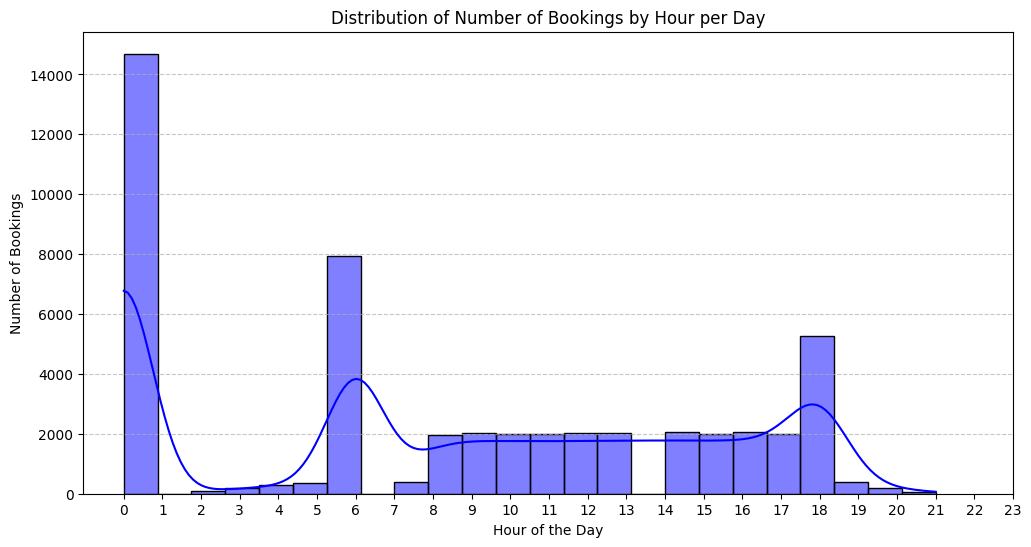

C:\Users\vae.tiolamon\AppData\Local\Temp\ipykernel_12092\2149834174.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='day_of_week', order=day_order, palette="viridis")


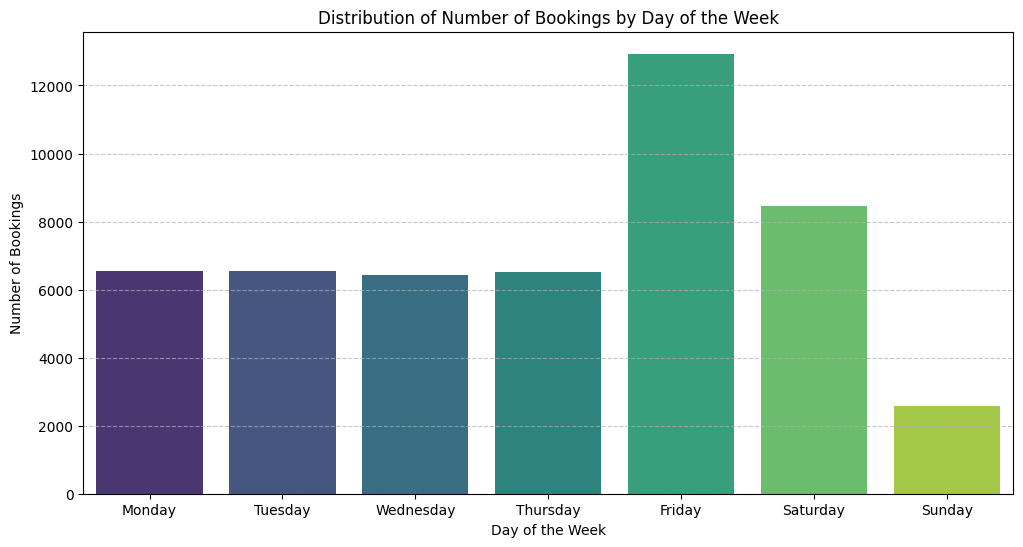

In [32]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the generated history data
with open('history_data.json', 'r') as file:
    history_data = json.load(file)

# Convert to DataFrame
df = pd.DataFrame(history_data)

# Convert booking_time column to actual datetime format
df['booking_time'] = pd.to_datetime(df['booking_time'])

# Extract hour and day of the week
df['hour'] = df['booking_time'].dt.hour
df['day_of_week'] = df['booking_time'].dt.day_name()

# Order days of the week correctly
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Plot Distribution of Number of Bookings by Hour per Day
plt.figure(figsize=(12, 6))
sns.histplot(df['hour'], bins=24, kde=True, color='blue')
plt.title("Distribution of Number of Bookings by Hour per Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Bookings")
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot Distribution of Number of Bookings by Day of the Week
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='day_of_week', order=day_order, palette="viridis")
plt.title("Distribution of Number of Bookings by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Bookings")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
